In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


C:\Users\ineso\Anaconda2\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ineso\Anaconda2\envs\py36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Neural Net"]

classifiers = [
    KNeighborsClassifier(9, algorithm='kd_tree'),
    SVC(kernel="linear", C=1),
    SVC(C=1, gamma=0.1, kernel='sigmoid'),
    DecisionTreeClassifier(max_depth=11, splitter='random',max_features=7),
    MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=50, max_iter=500)]


In [3]:
df = pd.read_csv('large_data.csv')
df['TYPE'] = df['TYPE'].astype('category')

In [4]:
input_names = list(df.columns)
input_names.remove('TYPE')

X = df[input_names].values
y = df['TYPE'].values

In [5]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [7]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [8]:
figure = plt.figure(figsize=(27, 9))
i=1

<Figure size 1944x648 with 0 Axes>

In [12]:
color_train = []
for c in y_train:
    if c == 'COVID':
        color_train.append(1)
    elif c == 'FLU':
        color_train.append(2)
    elif c == 'ALLERGY':
        color_train.append(3)
    elif c == 'COLd':
        color_train.append(4)
    

In [13]:
color_test = []
for c in y_test:
    if c == 'COVID':
        color_train.append(1)
    elif c == 'FLU':
        color_train.append(2)
    elif c == 'ALLERGY':
        color_train.append(3)
    elif c == 'COLd':
        color_train.append(4)

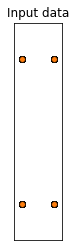

In [15]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")

ax.scatter(X_train[:, 0], X_train[:, 1], cmap=cm_bright, edgecolors='k')

ax.scatter(X_test[:, 0], X_test[:, 1], cmap=cm_bright, alpha=0.6, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

In [18]:
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

ValueError: query data dimension must match training data dimension

In [ ]:
plt.tight_layout()
plt.show()